# Selection of Neurons that exhibit high correlation with spesific orientations 

In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [82]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [83]:
id = 750332458
session = cache.get_session_data(id)

### Getting the table for static

In [84]:
table_static = session.get_stimulus_table("static_gratings")


table_static

,stimulus_block,start_time,stop_time,stimulus_name,orientation,contrast,phase,spatial_frequency,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,static_gratings,0.0,0.8,0.25,0.04,"[250.0, 250.0]",0.250209,4787
49435,8.0,5399.083416,5399.333625,static_gratings,0.0,0.8,0.0,0.32,"[250.0, 250.0]",0.250209,4788
49436,8.0,5399.333625,5399.583834,static_gratings,30.0,0.8,0.0,0.04,"[250.0, 250.0]",0.250209,4789
49437,8.0,5399.583834,5399.834042,static_gratings,90.0,0.8,0.75,0.08,"[250.0, 250.0]",0.250209,4790
49438,8.0,5399.834042,5400.084249,static_gratings,60.0,0.8,0.25,0.08,"[250.0, 250.0]",0.250206,4791
...,...,...,...,...,...,...,...,...,...,...,...
70385,14.0,9150.750794,9151.001012,static_gratings,90.0,0.8,0.75,0.32,"[250.0, 250.0]",0.250219,4847
70386,14.0,9151.001012,9151.251216,static_gratings,150.0,0.8,0.0,0.16,"[250.0, 250.0]",0.250204,4907
70387,14.0,9151.251216,9151.501420,static_gratings,30.0,0.8,0.0,0.16,"[250.0, 250.0]",0.250204,4818


In [85]:
session.units["ecephys_structure_acronym"]

unit_id
951817231     grey
951817222     grey
951817272     grey
951817282     grey
951817316     grey
             ...  
951824056    VISrl
951824038    VISrl
951824153    VISrl
951824594    VISrl
951824201    VISrl
Name: ecephys_structure_acronym, Length: 902, dtype: object

### Getting the number of spikes given the stimulus and the orientation

In [86]:
#unit_ids = session.units[session.units["ecephys_structure_acronym"] == "VISl"].index.values

stimulus_presentation_ids = table_static.index.values


spike_data = session.conditionwise_spike_statistics(
    stimulus_presentation_ids=stimulus_presentation_ids,
)

spike_data = spike_data.reset_index("unit_id")

table_static = table_static.reset_index()
table_static = table_static.set_index("stimulus_condition_id")

spike_data 

,unit_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
stimulus_condition_id,,,,,,
4787,951805352,70,49,1.428571,1.859659,0.265666
4787,951805369,61,49,1.244898,1.299529,0.185647
4787,951805392,137,49,2.795918,2.798657,0.399808
4787,951805411,58,49,1.183673,1.833411,0.261916
4787,951805440,49,49,1.000000,1.118034,0.159719
...,...,...,...,...,...,...
4907,951827752,144,48,3.000000,1.946082,0.280893
4907,951827758,2,48,0.041667,0.201941,0.029148
4907,951827774,2,48,0.041667,0.288675,0.041667


In [87]:
# Collapse duplicates (keep first occurrence)
table_static_unique = table_static.groupby('stimulus_condition_id')['orientation'].first()

# Assign to spike_data using index alignment
spike_data['orientation'] = spike_data.index.get_level_values('stimulus_condition_id').map(table_static_unique)

spike_data["orientation"].unique()

array([0.0, 30.0, 90.0, 60.0, 'null', 150.0, 120.0], dtype=object)

In [ ]:
#we need to drop null orientation
spike_data_clean = spike_data.drop(spike_data[spike_data["orientation"] == "null"].index)

spike_data_clean[spike_data_clean["orientation"] == "null"]

,unit_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,orientation
stimulus_condition_id,,,,,,,


### Look at OSI

Orientation Selectivity Index (OSI)

Calculation:
For each neuron, compute its tuning curve (mean firing rate across trials for each orientation). Use:

OSI= (R_preferred - R_orthogonal)/(R_preferred + R_orthogonal)


Justification: Neurons with high OSI (>0.5) are sharply tuned to specific orientations and are critical for encoding orientation information.

In [139]:
tuning_curves = spike_data_clean.groupby(['unit_id', 'orientation']).spike_count.mean().unstack()

tuning_curves

orientation,0.0,30.0,60.0,90.0,120.0,150.0
unit_id,,,,,,
951805352,71.20,71.60,68.95,68.40,74.45,67.70
951805369,61.60,57.55,61.20,59.65,62.30,63.40
951805392,111.15,105.20,106.90,108.40,108.20,106.75
951805411,57.35,51.00,55.95,54.60,58.55,55.80
951805440,42.10,37.85,42.30,38.70,39.70,40.85
...,...,...,...,...,...,...
951827752,142.90,134.70,57.00,85.20,79.50,90.95
951827758,7.70,9.20,15.05,17.55,12.50,8.90
951827774,3.00,4.45,1.50,3.65,2.90,2.30


In [ ]:
preferred_orientation = tuning_curves.idxmax(axis=1)
R_preferred = tuning_curves.max(axis=1)
R_orthogonal = tuning_curves.apply(lambda x: x[(x.idxmax() + 90) % 180], axis=1)  # Adjust for orthogonal orientation
OSI = (R_preferred - R_orthogonal) / (R_preferred + R_orthogonal + 1e-6)  

OSI.sort_values(ascending=False)


unit_id
951810647    0.835667
951810560    0.818086
951815212    0.800089
951819532    0.769541
951827457    0.757154
               ...   
951817974    0.000415
951817231    0.000145
951826439    0.000000
951806705    0.000000
951811642    0.000000
Length: 902, dtype: float64

### ANOVA

"Do neurons, as a population, respond differently to different orientations of static gratings?"

Null Hypothesis (H₀): All orientations elicit the same mean spike count (no tuning).

Alternative Hypothesis (H₁): At least one orientation elicits a significantly different mean spike count (tuning exists).

In [ ]:
from scipy.stats import f_oneway

p_values = spike_data_clean.groupby('unit_id').apply(
    lambda x: f_oneway(*[group.spike_count for name, group in x.groupby('orientation')])[1]
)

p_values


unit_id
951805352    0.514538
951805369    0.521989
951805392    0.869603
951805411    0.467857
951805440    0.481983
               ...   
951827752    0.000015
951827758    0.073842
951827774    0.364550
951827779    0.000529
951827845    0.010951
Length: 902, dtype: float64

### Adding Regions and selecting neurons

In [93]:
tuning_curves_with_regions = pd.merge(
    session.units["ecephys_structure_acronym"],
    tuning_curves,          
    on="unit_id",        
    how="inner"       
)

tuning_curves_with_regions


,ecephys_structure_acronym,0.0,30.0,60.0,90.0,120.0,150.0
unit_id,,,,,,,
951817231,grey,173.00,156.55,168.30,172.95,172.90,167.90
951817222,grey,163.50,161.75,152.50,159.60,164.30,157.20
951817272,grey,325.00,324.50,330.45,329.00,323.85,328.15
951817282,grey,120.05,119.35,112.10,115.75,115.20,117.05
951817316,grey,120.35,118.65,119.50,118.60,119.90,119.95
...,...,...,...,...,...,...,...
951824056,VISrl,85.05,105.95,90.90,78.95,85.55,85.35
951824038,VISrl,15.15,16.40,12.80,11.20,11.20,11.60
951824153,VISrl,84.60,76.40,81.90,76.65,73.65,75.65


In [137]:
filtered_neurons = OSI[(OSI > 0.5) & (p_values < 0.05)].index
selected_neurons = tuning_curves_with_regions.loc[filtered_neurons]

selected_neurons

,ecephys_structure_acronym,0.0,30.0,60.0,90.0,120.0,150.0
unit_id,,,,,,,
951810560,VISl,25.95,28.05,74.40,259.35,106.30,31.90
951810647,VISl,44.60,23.40,19.95,22.70,160.00,222.85
951810732,VISl,59.20,31.40,13.40,14.75,16.40,24.05
951810885,VISl,40.45,78.60,34.95,18.05,20.60,24.15
951810947,VISl,8.25,10.05,16.90,37.25,39.15,13.45
951811267,VISl,27.85,88.95,44.20,10.20,19.25,16.90
951811322,VISl,8.45,17.90,8.80,8.00,5.80,4.50
951811367,VISl,29.70,43.20,22.40,17.25,14.30,17.65
951811777,VISl,46.70,76.50,14.90,7.70,11.45,19.20


In [105]:
selected_neurons.groupby("ecephys_structure_acronym",).count().mean(axis=1)


ecephys_structure_acronym
VISal    15.0
VISam     6.0
VISl     10.0
VISp      9.0
VISrl     2.0
grey      1.0
dtype: float64

In [ ]:
selected_neurons_list = selected_neurons.index.unique()

print("Number of neurons selected:", len(selected_neurons_list))

selected_neurons_list

Number of neurons selected: 43


Int64Index([951810560, 951810647, 951810732, 951810885, 951810947, 951811267,
            951811322, 951811367, 951811777, 951811784, 951815078, 951815103,
            951815150, 951815212, 951815221, 951815365, 951815724, 951816139,
            951816866, 951819523, 951819532, 951819732, 951819918, 951819951,
            951820063, 951822125, 951823778, 951823785, 951826733, 951826859,
            951826875, 951827019, 951827043, 951827063, 951827233, 951827301,
            951827341, 951827383, 951827434, 951827457, 951827468, 951827478,
            951827738],
           dtype='int64', name='unit_id')

### Visualization

In [ ]:
# Melt orientation columns into rows

vis_df = selected_neurons.reset_index()

melted_df = pd.melt(
    vis_df,
    id_vars=["unit_id", "ecephys_structure_acronym"],
    value_vars=[0.0, 30.0, 60.0, 90.0, 120.0, 150.0],  
    var_name="orientation",
    value_name="spike_count"
)

melted_df

,unit_id,ecephys_structure_acronym,orientation,spike_count
0,951810560,VISl,0.0,25.95
1,951810647,VISl,0.0,44.60
2,951810732,VISl,0.0,59.20
3,951810885,VISl,0.0,40.45
4,951810947,VISl,0.0,8.25
...,...,...,...,...
253,951827434,VISal,150.0,89.55
254,951827457,VISal,150.0,17.45
255,951827468,VISal,150.0,6.90
256,951827478,VISal,150.0,1.45


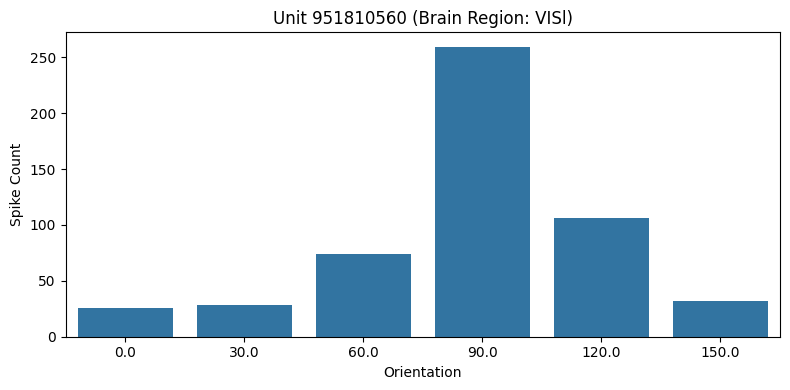

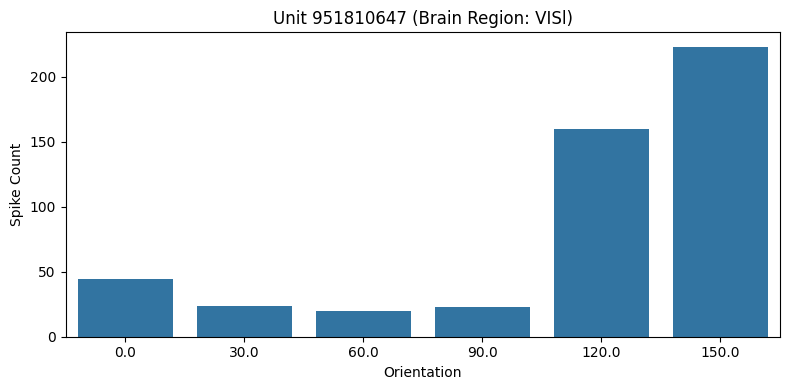

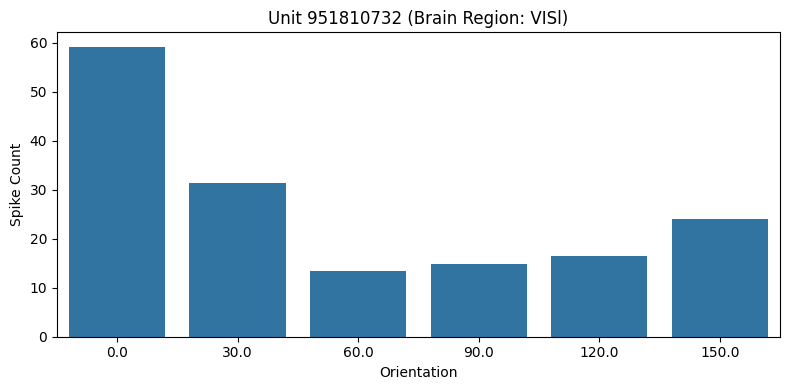

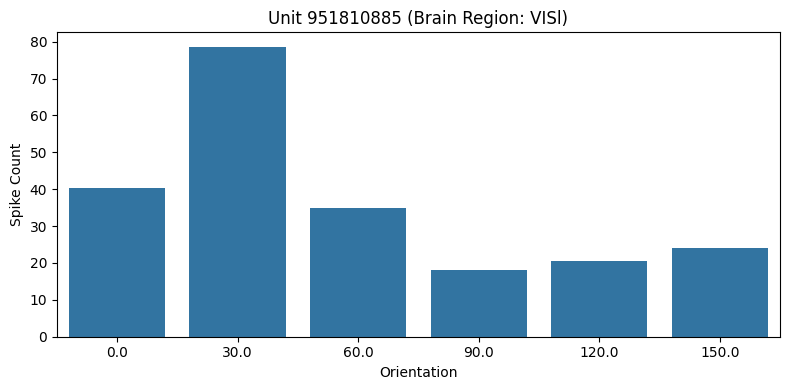

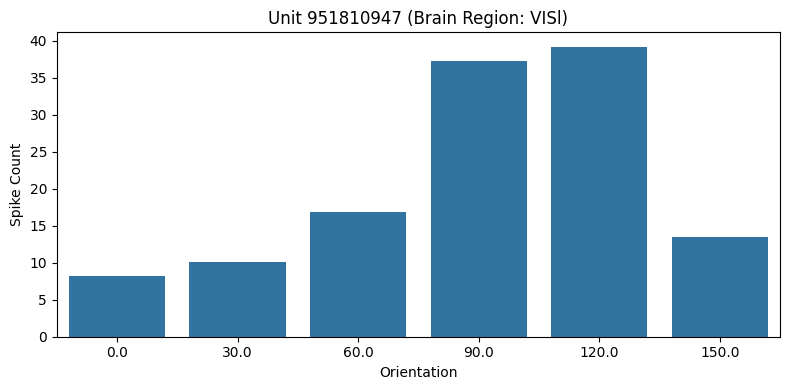

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique unit IDs
unit_ids = melted_df["unit_id"].unique()[:5]

for unit_id in unit_ids:
    # Filter data for the current neuron
    neuron_data = melted_df[melted_df["unit_id"] == unit_id]
    
    # Create figure
    plt.figure(figsize=(8, 4))
    
    # Bar plot
    sns.barplot(
        data=neuron_data,
        x="orientation",
        y="spike_count",
        order=[0.0, 30.0, 60.0, 90.0, 120.0, 150.0]  # Ensure correct order
    )
    
    # Add labels/title
    brain_region = neuron_data["ecephys_structure_acronym"].iloc[0]
    plt.title(f"Unit {unit_id} (Brain Region: {brain_region})", fontsize=12)
    plt.xlabel("Orientation", fontsize=10)
    plt.ylabel("Spike Count", fontsize=10)
    

    
    plt.tight_layout()
    plt.show()